In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read the movies data in the pandas dataframe
d1 = pd.read_csv('../input/imdb-movies-19272016/IMDB_Movies.csv')

In [3]:
#Check for null values in the dataset
nulls=d1.isnull().sum()
d1=d1.dropna(axis=0)

In [4]:
#drop unnecessary columns
d1=d1.drop(['color','movie_facebook_likes','aspect_ratio','actor_2_facebook_likes','movie_imdb_link','cast_total_facebook_likes','actor_1_facebook_likes','actor_3_facebook_likes','director_facebook_likes','facenumber_in_poster'],axis=1)

In [5]:
#Drop duplicate values
d1_dup=d1[d1.duplicated('movie_title')]
d1.drop_duplicates(subset='movie_title',keep=False,inplace=True)

#Replace none values in language columns with English
d1['language'] = d1['language'].replace(['None'], 'English')

In [6]:
#Convert the Budget, Profit Gross values in Million
d1['budget in Millions'] = d1['budget']/1000000
d1['gross in Millions'] = d1['gross']/1000000
d1['Profit in Millions'] = d1['gross in Millions']-d1['budget in Millions']

#Sort the movies in descending values of Profit
d1.sort_values(by=['Profit in Millions'],ascending=False)

#Find Top 10 directors with the most proftable movies
d1_top10_profitable = d1.sort_values(by=['Profit in Millions'],ascending=False).head(10)
d1_top10_profitable[['movie_title','director_name','Profit in Millions']]


,movie_title,director_name,Profit in Millions
0,Avatar,James Cameron,523.505847
29,Jurassic World,Colin Trevorrow,502.177271
26,Titanic,James Cameron,458.672302
3024,Star Wars: Episode IV - A New Hope,George Lucas,449.935665
3080,E.T. the Extra-Terrestrial,Steven Spielberg,424.449459
509,The Lion King,Roger Allers,377.783777
240,Star Wars: Episode I - The Phantom Menace,George Lucas,359.544677
66,The Dark Knight,Christopher Nolan,348.316061
439,The Hunger Games,Gary Ross,329.999255
812,Deadpool,Tim Miller,305.024263


Text(0.5, 1.0, 'Boxplot of Profit')

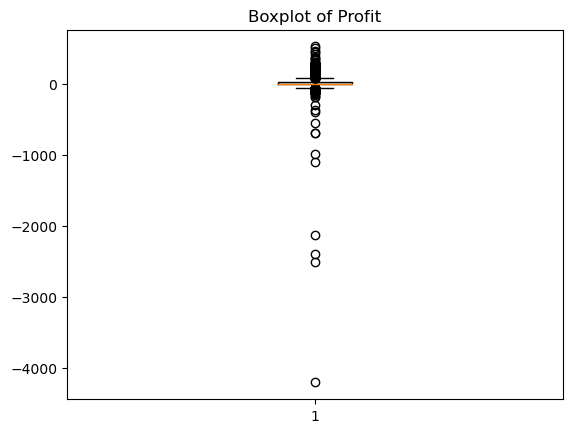

In [7]:
#Boxplot of the profit in Millions column to find any outliers
y1=d1['Profit in Millions']

plt.boxplot(y1)
plt.title("Boxplot of Profit")

In [8]:
#Find the outliers using interquartile range method
Q1_profit = np.percentile(d1['Profit in Millions'], 25,interpolation = 'midpoint')
Q3_profit = np.percentile(d1['Profit in Millions'], 75,interpolation = 'midpoint')
IQR_profit = Q3_profit - Q1_profit
profit_lower_range = Q1_profit-1.5*(IQR_profit)
profit_upper_range = Q3_profit+1.5*(IQR_profit)
print("Lower outlier limit :",profit_lower_range)
print("Upper outlier limit :",profit_upper_range)
df_out = d1[(d1['Profit in Millions'] < profit_lower_range) | (d1['Profit in Millions'] > profit_upper_range)]
df_out[['movie_title']]

Lower outlier limit : -62.820288250000004
Upper outlier limit : 77.40905375


,movie_title
0,Avatar
3,The Dark Knight Rises
5,John Carter
8,Avengers: Age of Ultron
10,Batman v Superman: Dawn of Justice
...,...
4530,Rocky
4542,Godzilla 2000
4674,American Graffiti
4707,The Blair Witch Project


In [9]:
#Top 250 Eng lang movies with highest IMDB score and user votes more than 250000
imdb_top_250_eng=pd.DataFrame()
imdb_top_250_eng["imdb_score_eng"]=d1[(d1['language']=="English") & (d1['num_voted_users']>25000)].imdb_score
imdb_top_250_eng["Top English"]=d1[(d1['language']=="English") & (d1['num_voted_users']>25000)].movie_title
imdb_top_250_eng["Top English Genre"]=d1[(d1['language']=="English") & (d1['num_voted_users']>25000)].genres
imdb_top_250_eng=imdb_top_250_eng.sort_values(by=["imdb_score_eng"],ascending=False).head(250)
imdb_top_250_eng["eng rank"]=imdb_top_250_eng['imdb_score_eng'].rank(method="max",ascending=False)

#Top 250 Foreign lang movies with highest IMDB score and user votes more than 250000
imdb_top_250_others=pd.DataFrame()
imdb_top_250_others["imdb_score_others"]=d1[(d1['language']!="English") & (d1['num_voted_users']>25000)].imdb_score
imdb_top_250_others["Top Foreign Lang"]=d1[(d1['language']!="English") & (d1['num_voted_users']>25000)].movie_title
imdb_top_250_others["Top Foreign Lang Genre"]=d1[(d1['language']!="English") & (d1['num_voted_users']>25000)].genres
imdb_top_250_others=imdb_top_250_others.sort_values(by=["imdb_score_others"],ascending=False).head(250)
imdb_top_250_others["others rank"]=imdb_top_250_others['imdb_score_others'].rank(method="max",ascending=False)
imdb_top_250_eng

,imdb_score_eng,Top English,Top English Genre,eng rank
1937,9.3,The Shawshank Redemption,Crime|Drama,1.0
3466,9.2,The Godfather,Crime|Drama,2.0
2837,9.0,The Godfather: Part II,Crime|Drama,4.0
66,9.0,The Dark Knight,Action|Crime|Drama|Thriller,4.0
3355,8.9,Pulp Fiction,Crime|Drama,7.0
...,...,...,...,...
4353,7.8,Man on Wire,Biography|Crime|Documentary|History|Thriller,250.0
4003,7.8,Evil Dead II,Comedy|Fantasy|Horror|Thriller,250.0
3586,7.8,Ordinary People,Drama,250.0
516,7.8,The Little Prince,Adventure|Animation|Drama|Family|Fantasy,250.0


In [10]:
imdb_top_250_others

,imdb_score_others,Top Foreign Lang,Top Foreign Lang Genre,others rank
4498,8.9,"The Good, the Bad and the Ugly",Western,1.0
4029,8.7,City of God,Crime|Drama,3.0
4747,8.7,Seven Samurai,Action|Adventure|Drama,3.0
2373,8.6,Spirited Away,Adventure|Animation|Family|Fantasy,4.0
4259,8.5,The Lives of Others,Drama|Thriller,6.0
...,...,...,...,...
3883,6.5,Night Watch,Fantasy|Thriller,82.0
377,6.4,The Interpreter,Crime|Mystery|Thriller,84.0
4671,6.4,Dead Snow,Comedy|Horror,84.0
484,5.9,The Legend of Zorro,Action|Adventure|Western,85.0


In [11]:
#Top directors with highest IMDB scores
top_directors=d1.groupby('director_name')['director_name','imdb_score'].mean()
top_directors=top_directors.sort_values(by=['imdb_score','director_name'],ascending=[False,True]).head(10)
top_directors

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,imdb_score
director_name,
Akira Kurosawa,8.700000
Charles Chaplin,8.600000
Tony Kaye,8.600000
Alfred Hitchcock,8.500000
Damien Chazelle,8.500000
Florian Henckel von Donnersmarck,8.500000
Majid Majidi,8.500000
Ron Fricke,8.500000
Sergio Leone,8.433333


In [12]:
# Create a new dataframe to store the split genres
genre_df = pd.DataFrame(columns=['genre'])

# Split the genres and append them to the new dataframe
for index, row in imdb_top_250_eng.iterrows():
    genres = row['Top English Genre'].split('|')
    for genre in genres:
        genre_df = genre_df.append({'genre': genre}, ignore_index=True)
for index, row in imdb_top_250_others.iterrows():
    genres = row['Top Foreign Lang Genre'].split('|')
    for genre in genres:
        genre_df = genre_df.append({'genre': genre}, ignore_index=True)
g1=genre_df.value_counts().head(10)



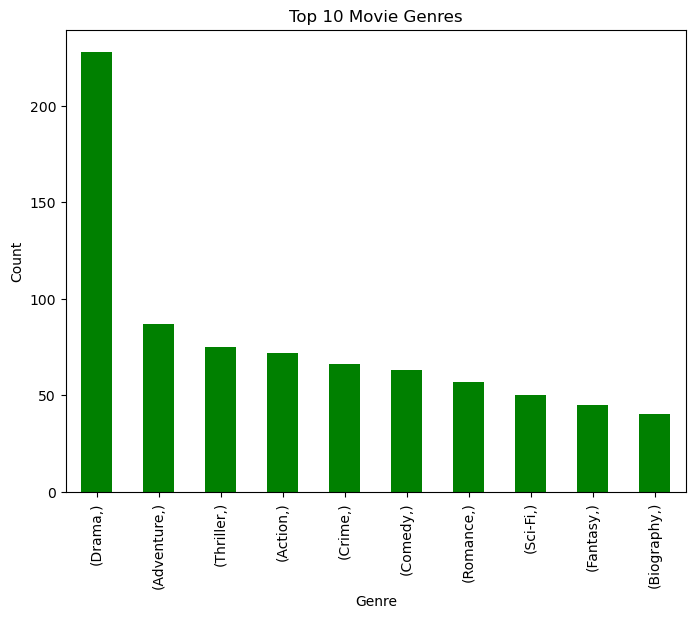

In [13]:
plt.figure(figsize=(8,6))  # set the size of the figure
g1.plot(kind='bar', color='green')  # create a bar plot with green bars
plt.title('Top 10 Movie Genres')  # add a title to the plot
plt.xlabel('Genre')  # add a label to the x-axis
plt.ylabel('Count')  # add a label to the y-axis
plt.show()

In [14]:
#Assumption actor_1 is the lead actor
Meryl_Streep = d1[d1['actor_1_name']=='Meryl Streep'] #Movies in which Meryl Streep is the lead actor
Leonardo_DiCaprio = d1[d1['actor_1_name']=='Leonardo DiCaprio'] #Movies in which Leonardo DiCaprio is the lead actor
Brad_Pitt = d1[d1['actor_1_name']=='Brad Pitt']  #Movies in which Brad Pitt is the lead actor

#Combined dataset in which Meryl Streep,Leonardo DiCaprio and Brad Pitt have acted
Combined_Movies = Meryl_Streep.append([Leonardo_DiCaprio, Brad_Pitt]) 

Combined_Movies
Combined_Movies.num_user_for_reviews=Combined_Movies.num_user_for_reviews.astype('int') #datatype conversion

#Finding out which actor out of Meryl Streep,Leonardo DiCaprio and Brad Pitt have highest user ratings and critic ratings
Combined_Movies.groupby('actor_1_name')[['num_critic_for_reviews','num_user_for_reviews']].mean().sort_values(by=['num_critic_for_reviews','num_user_for_reviews'],ascending=False)

,num_critic_for_reviews,num_user_for_reviews
actor_1_name,,
Leonardo DiCaprio,313.368421,931.473684
Brad Pitt,245.000000,742.352941
Meryl Streep,181.454545,297.181818


In [15]:
#Finding which actors have highest user ratings and critics ratings overall - assumption actor_1 is the lead actor
d1.num_user_for_reviews=d1.num_user_for_reviews.astype('int')
d1.groupby('actor_1_name')[['num_critic_for_reviews','num_user_for_reviews']].mean().sort_values(by=['num_critic_for_reviews','num_user_for_reviews'],ascending=False).head(10)

,num_critic_for_reviews,num_user_for_reviews
actor_1_name,,
Phaldut Sharma,738.0,1885.0
Peter Capaldi,654.0,995.0
Craig Stark,596.0,1018.0
Bérénice Bejo,576.0,583.0
Suraj Sharma,552.0,755.0
Ellar Coltrane,548.0,836.0
Mike Howard,546.0,405.0
Lou Taylor Pucci,543.0,789.0
Joel Courtney,539.0,849.0


Text(0, 0.5, 'User votes count')

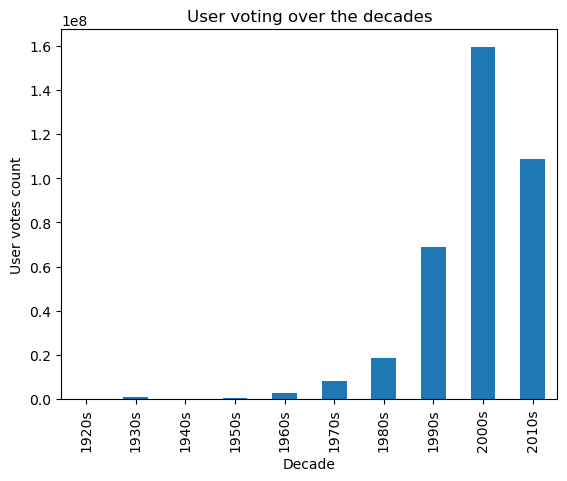

In [16]:
#Classifying the years in different columns and findout how the users have voted for the movies in each decade
bins=[1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020]
labels=["1920s","1930s","1940s","1950s","1960s","1970s","1980s","1990s","2000s","2010s"]
d1['decade'] = pd.cut(d1['title_year'], bins=bins, labels=labels,right=False)
df_by_decade=pd.DataFrame
df_by_decade=d1.groupby('decade')['num_voted_users'].sum()

df_by_decade.plot(kind="bar")
plt.title("User voting over the decades")
plt.xlabel("Decade")
plt.ylabel("User votes count")